In [32]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from lib import import_data
import pandas as pd

In [23]:
import_data.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [24]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot

# ETB-046 Variables
samples_dir_etb046 = "190722 ETB-046 MAPbI on glass FF/"
data_dict_etb046 = import_data.init(flag, samples_dir_etb046)
cypher_etb046 = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "5min",
    "20min",
)

Creating new local data folder.
['figures', '20min Tomas_quick gonio scan_1.xrdml', 'junk', '5min Tomas_quick gonio scan_1.xrdml', 'raw', '3min Tomas_quick gonio scan_1.xrdml', '1min Tomas_quick gonio scan_1.xrdml', 'py_data', '2min Tomas_quick gonio scan_1.xrdml', '30sec Tomas_quick gonio scan_1.xrdml']
['figures', '1min.xrdml', '5min.xrdml', 'junk', 'raw', '30sec.xrdml', '3min.xrdml', '2min.xrdml', 'py_data', '20min.xrdml']
skipped figures
reading 1min.xrdml
reading 5min.xrdml
skipped junk
skipped raw
reading 30sec.xrdml
reading 3min.xrdml
reading 2min.xrdml
skipped py_data
reading 20min.xrdml


In [25]:
# ETB-047 Variables
samples_dir_etb047 = "190903 ETB-047 MAPbI on glass FF/"
data_dict_etb047 = import_data.init(flag, samples_dir_etb047)
print(data_dict_etb047.keys())
cypher_etb047 = (
    "10min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

Creating new local data folder.
['80min Tomas_quick gonio scan_1.xrdml', '10min Tomas_quick gonio scan_1.xrdml', 'figures', '100min Tomas_quick gonio scan_1.xrdml', '40min Tomas_quick gonio scan_1.xrdml', 'junk', 'raw', '120min Tomas_quick gonio scan_1.xrdml', '60min Tomas_quick gonio scan_1.xrdml', 'py_data']
['10min.xrdml', '60min.xrdml', '120min.xrdml', 'figures', '40min.xrdml', '100min.xrdml', 'junk', 'raw', 'py_data', '80min.xrdml']
reading 10min.xrdml
reading 60min.xrdml
reading 120min.xrdml
skipped figures
reading 40min.xrdml
reading 100min.xrdml
skipped junk
skipped raw
skipped py_data
reading 80min.xrdml
dict_keys(['10min', '60min', '120min', '40min', '100min', '80min'])


In [26]:
# ETB-048 Variables
samples_dir_etb048 = "190904 ETB-048 MAPbI on glass FF/"
data_dict_etb048 = import_data.init(flag, samples_dir_etb048)
print(data_dict_etb048.keys())

cypher_etb048 = (
    "4min",
    "15min",
)

Creating new local data folder.
['15min Tomas_quick gonio scan_1.xrdml', 'figures', '4min Tomas_quick gonio scan_1.xrdml', 'junk', 'raw', 'py_data']
['15min.xrdml', 'figures', '4min.xrdml', 'junk', 'raw', 'py_data']
reading 15min.xrdml
skipped figures
reading 4min.xrdml
skipped junk
skipped raw
skipped py_data
dict_keys(['15min', '4min'])


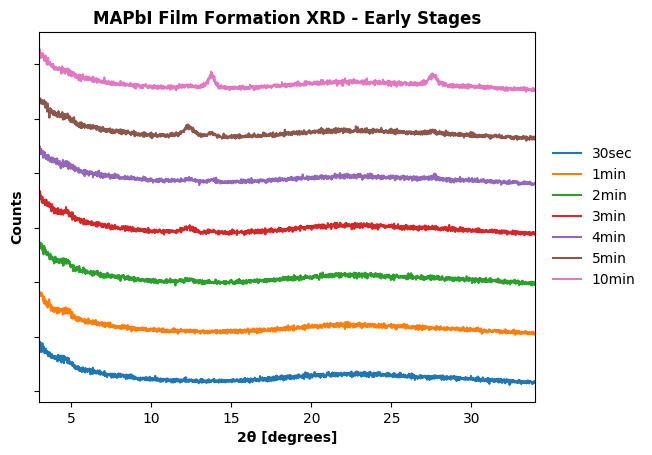

In [144]:
fig = plt.figure(1)
fig_ax = plt.gca()

offset = 0
master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
)

for key in master_cypher:
    if key in data_dict_etb046.keys():
        plt.figure(1)
        plt.plot(data_dict_etb046[key]["2theta"], data_dict_etb046[key]["counts"] + offset,
                 label=key)
        offset += max(data_dict_etb046[key]["counts"])
    elif key in data_dict_etb047.keys():
        plt.figure(1)
        plt.plot(data_dict_etb047[key]["2theta"], data_dict_etb047[key]["counts"] + offset,
                 label=key)
        offset += max(data_dict_etb047[key]["counts"])
    elif key in data_dict_etb048.keys():
        plt.figure(1)
        plt.plot(data_dict_etb048[key]["2theta"], data_dict_etb048[key]["counts"] + offset,
                 label=key)
        offset += max(data_dict_etb048[key]["counts"])

plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(data_dict_etb046["1min"]["2theta"]), max(data_dict_etb046["1min"]["2theta"]))

plt.title("MAPbI Film Formation XRD - Early Stages",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [146]:
fig.savefig("test.png", dpi=200, format='png', bbox_inches='tight')